##  Machine Learning 
### Multi-Variable Regression with Regression Trees


In this example, it is shown how to build a model to estimate the price of a house based on the characteristics of the house and the neighborhood. The Boston dataset, which comes as an example in sklearn, is used, and a regression tree algorithm is used as the model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

El paquete *datasets* trae cojuntos de prueba y utilidades para descargar o generar datasets de entrenamiento 

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_data = load_boston()

In [4]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Utilizamos las características y la variable objetivo directamente del diccionario disponible en la variable boston_data. Entrenameros un **arbol de regresión**.

In [7]:
features = boston_data['data']
target = boston_data['target']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error

In [9]:
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.3,
                                                    random_state=7)

In [10]:
regtree = DecisionTreeRegressor()
regtree = regtree.fit(x_train, y_train)

Calculamos las predicciones del conjunto de test y sobre el propio conjunto de train para comparar

In [11]:
y_pred = regtree.predict(x_test)
y_pred_train = regtree.predict(x_train)

Nos interesa representar las predicciones vs los valores reales. Las mejores estimaciones estarán más cerca de la diagonal

Text(0, 0.5, 'Precio Estimado')

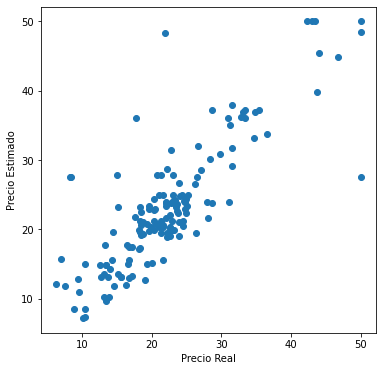

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Precio Real")
plt.ylabel("Precio Estimado")

Calculamos la métrica $R^2$ en ambos casos

In [13]:
r2_score(y_test, y_pred) 

0.6284998900488474

In [14]:
r2_score(y_train, y_pred_train)

1.0

___

#### Interpretar el Arbol de Regresión
Al igual que los árboles de decisión podemos representar los árboles de regresión para interpretar los caminos que se toman para tomar la desición final en los nodos hoja

Para mantener la sencillez haremos un árbol con profundidad limitada

In [15]:
regtree = DecisionTreeRegressor(max_depth=4)
regtree = regtree.fit(x_train, y_train)

Guardamos además la imagen como fichero, para facilitar su lectura  

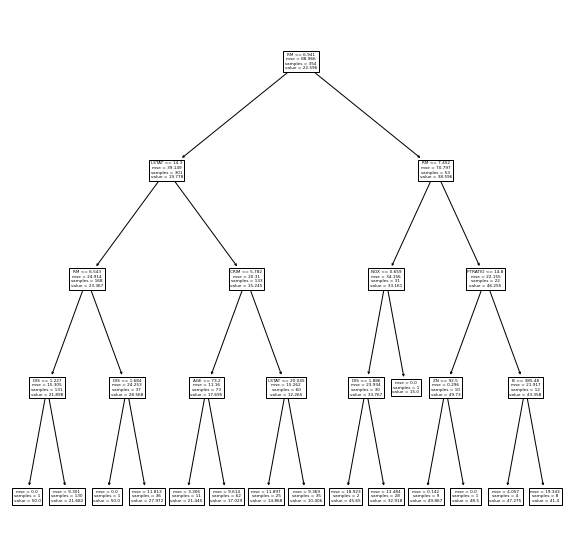

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
_ = plot_tree(regtree, feature_names=boston_data['feature_names'])
plt.savefig('regresion_tree.pdf', format='pdf')

___


Hacer una gráfica que muestre como evoluciona el raíz del error cuadrático medio,
tanto en train como en test, según cambiamos la profundidad máxima del árbol.
Los pasos a seguir son:
1. Hacer un bulce para entrenar el árbol según la iteración ej. de 1 a 8
2. Calcular y almacenar el RSME correspondiente con ayuda de la función *mean_squared_error*
3. Dibujar la gráfica con los errores almacenados

In [17]:
from sklearn.metrics import mean_squared_error

un dataframe para almacenar los errores

In [18]:
errores = pd.DataFrame(columns=['mse_train','mse_test'])

Bucle para ir variando la profundidad del arbol

In [19]:
for i_depth in range(1, 10):
    regtree = DecisionTreeRegressor(max_depth=i_depth)
    regtree = regtree.fit(x_train, y_train)

    pred_train = regtree.predict(x_train)
    pred_test = regtree.predict(x_test)
    
    errores.loc[i_depth, 'mse_train'] = mean_squared_error(y_train, pred_train)
    errores.loc[i_depth, 'mse_test'] = mean_squared_error(y_test, pred_test)   

Gráfica de la evolución del error. A partir de profundidad 4, vemos que empieza
a sobre-entrenarse el modelo porque se amplia la diferencia del error entre
train y test

<AxesSubplot:>

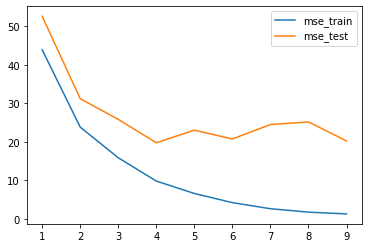

In [20]:
errores.plot()